# Chapter 7: Derivatives

In [1]:
# Preface: Install necessary packages:
import numpy as np
import matplotlib.pyplot as plt

I chose to omit notes on chapter six due to it being very short and more of an example chapter than something to take actual notes on. Instead, So, I'll instead offer a two sentence summary: a.) it's not efficient to optimize a neural network by just making random guesses x number of times and taking the best weights; b.) it makes more sense to follow a "trail" of performance, where once you see a better performing set of weights and biases then you go and make changes starting from that new baseline. The latter of those two is the idea that we'll spend this chapter beginning to develop. 

The fundamental idea we need to grasp here is that weights and biases impact the performance and loss of a layer. While it is not direct (you can look back to the categorical cross-entropy loss in chapter five), the weights and biases are responsible for the output of the layer and therefore the loss itself.

## Section 1: The Impact of a Parameter on the Output

Lets begin to visualize "impact" with a very simple function: 

[0 1 2 3 4]
[0 2 4 6 8]


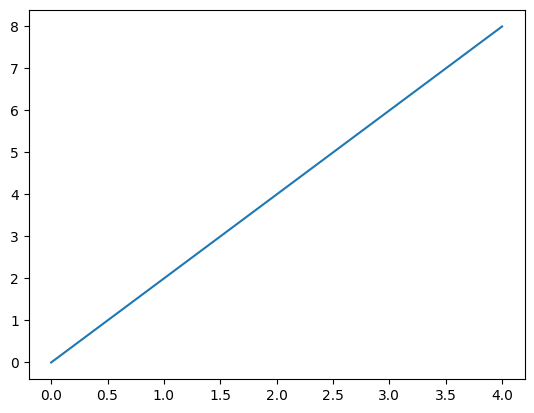

In [6]:
# A simple function that just doubles the input
def f(x):
    return 2*x

# Create an array of length 5 with entries [0, 4]
x = np.array(range(5))
y = f(x)

print(x)
print(y)

plt.plot(x, y)
plt.show()

What we see above is simply the "impact" of our function f(x), which returns a slope of 2 given the rise over run.

## Section 2: Slope

As we know, the formula for slope is just rise/run, or change(x)/change(y). I won't dive too deep into the weeds there. But that's a linear function, so slope will always be the same. How do things change when we create a slope that is non-linear? Let's see.

[0 1 2 3 4]
[ 0  2  8 18 32]


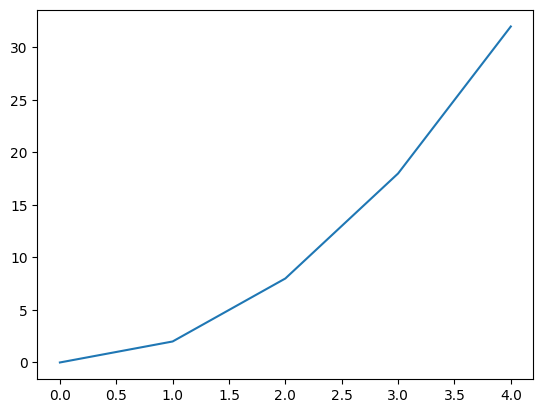

In [9]:
# A function that carries out 2x^2
def g(x):
    return 2*x**2

# Again creating a list of length 5 with entries [0,4]
x = np.array(range(5))
y = g(x)

print(x)
print(y)

plt.plot(x, y)
plt.show()

But now, in the above, as the function is non-linear, the slope will change depending on the point at which you try to calculate it.

For example, if we look at the line at section between 0 and 1, then if we do the rise/run formula we would get (2-0)/(1-0) which is 2. However, if we do this same operation on the section between 1 and 2, then we'll get (8-2)/(2-1) which is 6.

So, if you remember from your calculus days, we can formalize that: the tangent line is the slope at any point on a line, which is calculated using the derivative. This purpose of this isn't to review calculus, so I'll let you do that on your own, but for a quick example: if the formuala is 2x^2, then the derivative becomes 4x and we can therefore find the slope at any point using 4(x). For example, if we look at when x = 0.5, then we get the slope = 2, which checks out with our previous calculations.

Here too, we go and add a very small value to our entries to ensure that we won't ever be dividing by 0. 

We can do all of the above in python as such:

In [10]:
# Value small enough to produce a negligible difference but also large enough to be non-zero
offset = 0.0001

x1 = 1
x2 = x1 + offset

y1 = g(x1)
y2 = g(x2)

derivative = (y2 - y1)/(x2 - x1)
print(derivative)

4.0001999999987845


In a perfect world, the above derivative would truly just be 4.0 - but we need to add the offset to ensure no pure 0's.  

## Section 3: The Numerical Derivative

The above shown method is called numerical differentiation. It calculates the tangent line by using two infinitely close points -- i.e. point a = int, and point b = a + delta where delta is insignificant. 

We can visualize this by leveraging the np.arange() function, which plots with smaller steps. The arange function takes in start, stop, and step parameters, giving a smoother line.

Lets demonstrate below:

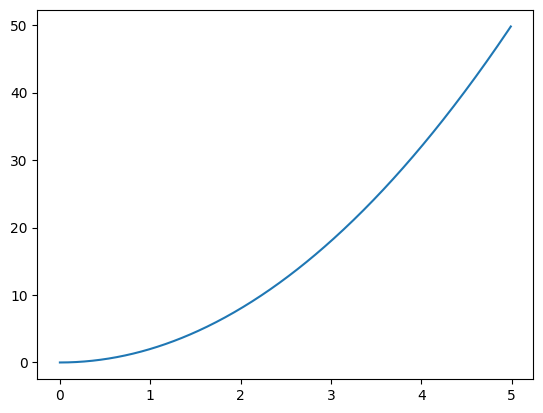

In [11]:
# Create the array from 0, 5 from entries with 0.01 as a step.
x = np.arange(0, 5, 0.01)
# Run 2*x**2 on x
y = g(x)

plt.plot(x, y)
plt.show()

Now, if you think back to what we had shown previously, that's a much smoother line for our equation y=2x^2!

Understanding the role of the tangent line is very important -- and especially its slope. The slope of the tangent line will inform us about how our weight x impacts the function at this exact point in time. We refer to that slope at that moment as the instantaneous rate of change.

The book has a lot of material (examples specifically) on this, but I'm pretty familiar with the Calculus so I'll skip it. If you aren't comfortable with differentiation and derivatives I would recommend that you briefly review a Calculus textbook for your own reference.

### Anyways, that's it for this chapter! Thanks for following along with my annotations of *Neural Networks from Scratch* by Kinsley and Kukieła!